In [1]:
# Dependencies and Setup
import matplotlib
#matplotlib.use('Agg')
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Study data files
mouse_df = "Mouse_metadata.csv"
study_results_df = "Study_results.csv"
# mouse_metadata_path
# study_results.csv
# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_df)
study_results_df = pd.read_csv(study_results_df)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_df, study_results_df, on="Mouse ID")
combined_df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the number of mice.
mice= len(mouse_df["Mouse ID"].value_counts())
mice_count=pd.DataFrame([mice], columns = ["Mice Count"])
mice_count


,Mice Count
0,249


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID","Timepoint" ])]

# dupRows_df = combined_df[combined_df.duplicated()]
# dupRows_df
# dupe= len(duplicates["Mouse ID"].value_counts())
# dupe_count=pd.DataFrame([mice], columns = ["dupe count"])
#print(dupe_count)
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = combined_df.loc[combined_df["Mouse ID"]=="g989", :]
dupe_mouse.shape
dupe= len(mouse_df["Mouse ID"].value_counts())

dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#dup_mouse = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID"])]
dup_mouse = combined_df.loc[combined_df.duplicated()]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset = "Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Check the number of mice in the clean DataFrame.
clean_mice = len(clean_df["Mouse ID"].value_counts())
clean_mice_count=pd.DataFrame([mice], columns = ["Clean Mice Count"])
clean_mice_count

,Clean Mice Count
0,249


 Summary Statistics

In [9]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_mean
tumor_median = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_median
tumor_variance = combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_standard_dev = combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

tumorstat = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_standard_dev, tumor_sem], axis = 1)
tumorstat.columns = ["Tumor Mean", "Tumor Median", "Tumor Var", "Tumor STD", "Tumor SEM"] 
tumorstat
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Mean,Tumor Median,Tumor Var,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_results = combined_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
tumor_results
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

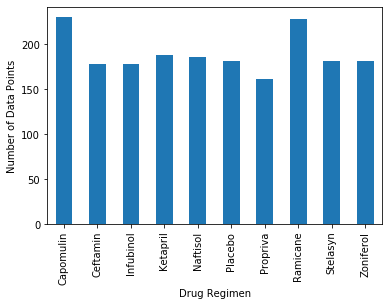

In [11]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
dgrcount= combined_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
#print(dgrcount)
dgrcount.plot.bar()
#plt.plot(tumor_results, dgr)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.savefig("Pandas - BarChart.png")
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

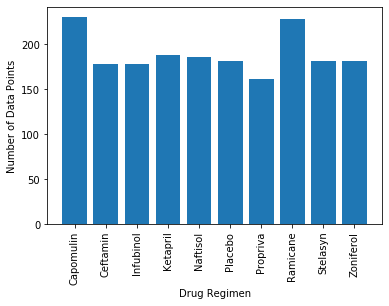

In [12]:
 # Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
dgrcount= combined_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
#print(dgrcount)

plt.bar(dgrcount.index, dgrcount.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)
plt.savefig("PyPlot-BarChart.png")
plt.show()
##  Note: this plot will be identical to the one that uses Pandas

        Total Count   Sex
Sex                      
Female          124  49.8
Male            125  50.2


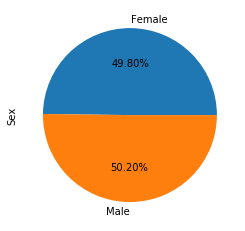

In [13]:
 # count female and male

total_mice = len(combined_df["Mouse ID"].unique())
   
grouped_mice = combined_df.groupby("Sex")["Mouse ID"].nunique()

n_combined_df = grouped_mice.to_frame("Total Count")
n_combined_df['Sex'] = round(n_combined_df/total_mice*100,2)
n_combined_df.plot.pie(y = "Sex", legend = False, autopct = "%.2f%%")
#plt.ylabel("Sex")
plt.savefig("PieChart_Gender.png")
print(n_combined_df)


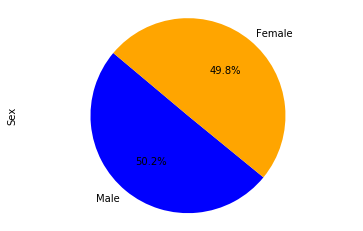

In [14]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

#n_combined_df.plot.bar()
labels = ["Male", "Female"]
sizes = [125,124]
colors = ["blue", "orange"]
to_explode = (0, 0)


gender = ["Male", "Female"]
total_count = [124,125]
colors = ["blue", "orange"] 
to_explode = (0, 0)

plt.ylabel("Sex")
plt.pie(sizes, explode=to_explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)

plt.axis("equal")

plt.pie
plt.savefig("Pandas_PieChart_Gender.png")
## Note: this plot will be identical to the one that uses Pyplot

 Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (latest) timepoint for each mouse
#last_tpt = combined_df.groupby("Sex")["Mouse ID"].nunique()
last_tpt = combined_df.groupby("Mouse ID").max()["Timepoint"]

last_tpt = pd.DataFrame(last_tpt)
last_tpt

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tpt_combined = pd.merge(last_tpt, combined_df, on =("Mouse ID", "Timepoint"), how = "left")
last_tpt_combined

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
cap = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ram = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane",:]
inf = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol",:]
cef = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin",:]

regimenfour_df = pd.concat([cap, ram, inf, cef]) 

captv = cap["Tumor Volume (mm3)"]
ramtv = ram["Tumor Volume (mm3)"]
inftv = inf["Tumor Volume (mm3)"]
ceftv = cef["Tumor Volume (mm3)"]
n_drugtv_df = ([captv, ramtv, inftv, ceftv])


regimenfour_df = regimenfour_df[regimenfour_df['Timepoint'] == 45]
regimenfour_df
                                     
# plt.ylabel("Final Tumor Volume (mm3)")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [17]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

n_drugs = ["Capoumulin", "Ramican", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_volume = []
ramican_volume = []
infubinol_volume = []
ceftamin_volume = []

regimenfour_df
        

tumor_volume_list = pd.DataFrame({"capomulin":capomulin_volume,
                                  "ramican": ramican_volume,
                                  "infubinol": infubinol_volume,
                                  "ceftamin": ceftamin_volume})
tumor_volume_list
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = captv.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.") 
quartiles = ramtv.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramican values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.") 
quartiles = inftv.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.") 
quartiles = ceftv.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamine values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.") 



Capomulin values below 26.71 and above 55.97 could be outliers.
Ramican values below 24.19 and above 57.49 could be outliers.
Infubinol values below 32.31 and above 72.32 could be outliers.
Ceftamine values below 32.82 and above 71.19 could be outliers.


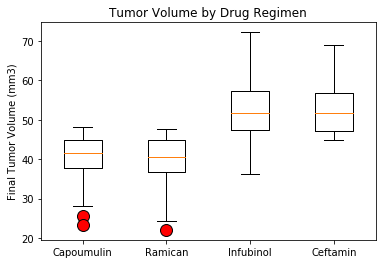

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor = "red", markersize = "12")
plt.boxplot([cap ["Tumor Volume (mm3)"], ram ["Tumor Volume (mm3)"], \
             inf ["Tumor Volume (mm3)"], cef ["Tumor Volume (mm3)"]], flierprops = orange_out)


n_drugs = ["Capoumulin", "Ramican", "Infubinol", "Ceftamin"]

plt.xticks([1,2,3,4], n_drugs)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")

plt.show()

In [20]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
#capumulin dataframe
cap = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
mouse = cap.loc[cap["Mouse ID"] =="s185"]
cap.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


 Line and Scatter Plots

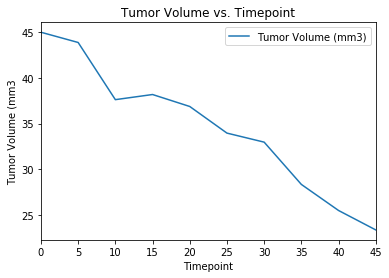

In [22]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
#capumulin dataframe
cap = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
mouse = cap.loc[cap["Mouse ID"] =="s185"]
#cap.head()

mouse.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", title = "Timepoint vs. Tumor Volume")
plt.ylabel("Tumor Volume (mm3")
plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")

plt.xlim(0,45)
plt.show()

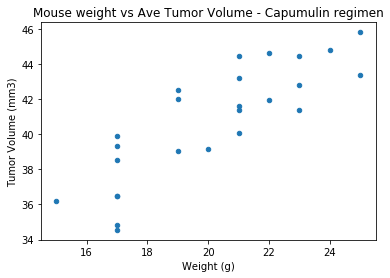

In [24]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
grouped_cap = cap.groupby("Mouse ID")
volume = grouped_cap["Tumor Volume (mm3)"].mean()
weight = grouped_cap["Weight (g)"].mean()
table = pd.merge(volume, weight, how="inner", on="Mouse ID")
table.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse weight vs \
Ave Tumor Volume - Capumulin regimen")

plt.show()

# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

Correlation and Regression

In [25]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
correlation = st.pearsonr(volume, weight)
print(f"The correlation coefficient between tumor volume and weight is {round(correlation[0],2)}.")

The correlation coefficient between tumor volume and weight is 0.84.


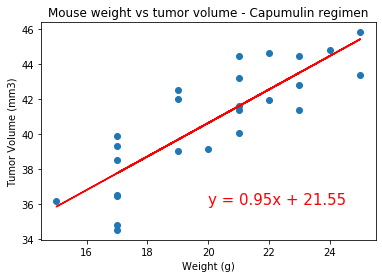

In [26]:
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse weight vs tumor volume - Capumulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()